In [3]:
from autograd import grad

import autograd.numpy as np
import pickle as pkl
import json
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2
%load_ext cython

In [4]:
# Open the data file that contains the HIV protease data

df = pd.read_csv('../data/hiv_data/hiv-protease-data-expanded.csv', index_col=0)
df = df.dropna(subset=['FPV'])
df.head()

,ATV,DRV,FPV,IDV,LPV,NFV,SQV,SeqID,TPV,seqid,sequence,sequence_object,weight
0,NaN,NaN,2.5,16.3,NaN,38.6,16.1,2996,NaN,2996-0,PQITLWQRPIVTIKIGGQLKEALLDTGADDTVLEDVNLPGRWKPKM...,ID: 2996-0\nName: <unknown name>\nDescription:...,0.50
1,NaN,NaN,2.5,16.3,NaN,38.6,16.1,2996,NaN,2996-1,PQITLWQRPIVTIKIGGQLKEALLDTGADDTVLEDVNLPGRWKPKM...,ID: 2996-1\nName: <unknown name>\nDescription:...,0.50
2,NaN,NaN,0.7,0.8,NaN,0.8,1.1,4387,NaN,4387-0,PQITLWQRPLVTIKVGGQLKEALLDTGADDTVLEDMELPGRWKPKM...,ID: 4387-0\nName: <unknown name>\nDescription:...,0.25
3,NaN,NaN,0.7,0.8,NaN,0.8,1.1,4387,NaN,4387-1,PQITLWQRPLVTIKVGGQLKEALLDTGADDTVLEDMELPGRWKPKM...,ID: 4387-1\nName: <unknown name>\nDescription:...,0.25
4,NaN,NaN,0.7,0.8,NaN,0.8,1.1,4387,NaN,4387-2,PQITLWQRPLVTIKVGGQLKEALLDTGADDTVLEDMELPGRWKPKM...,ID: 4387-2\nName: <unknown name>\nDescription:...,0.25


In [5]:
# Open the numpy array of all graphs' data.
graph_arr = np.load('../data/feat_array.npy')

In [6]:
# Open the pickles that contain the graph information and node-nbr information.
def unpickle_data(path):
    with open(path, 'rb') as f:
        data = pkl.load(f)
    return data

graph_idxs = unpickle_data('../data/graph_idxs.pkl')
graph_nodes = unpickle_data('../data/graph_nodes.pkl')
nodes_nbrs = unpickle_data('../data/nodes_nbrs.pkl')

In [7]:
list(graph_idxs.keys())[0:5]
# len(graph_idxs.keys())

['61143-1', '230072-0', '109450-2', '68350-0', '86690-0']

In [8]:
list(graph_nodes.items())[0]

('61143-1',
 {461513: 'A70LYS',
  461514: 'A19LEU',
  461515: 'B93LEU',
  461516: 'B73GLY',
  461517: 'A36MET',
  461518: 'B49GLY',
  461519: 'A12THR',
  461520: 'B14LYS',
  461521: 'A24LEU',
  461522: 'B68GLY',
  461523: 'B4THR',
  461524: 'A88ASN',
  461525: 'B2GLN',
  461526: 'A29ASP',
  461527: 'A6TRP',
  461528: 'A33PHE',
  461529: 'A32VAL',
  461530: 'A3ILE',
  461531: 'B75VAL',
  461532: 'A42TRP',
  461533: 'A34GLU',
  461534: 'A65GLU',
  461535: 'A53PHE',
  461536: 'A85ILE',
  461537: 'B6TRP',
  461538: 'A94GLY',
  461539: 'B30ASP',
  461540: 'A52GLY',
  461541: 'B66ILE',
  461542: 'B98ASN',
  461543: 'B70LYS',
  461544: 'B32VAL',
  461545: 'A2GLN',
  461546: 'B79PRO',
  461547: 'A44PRO',
  461548: 'A22ALA',
  461549: 'B28ALA',
  461550: 'B94GLY',
  461551: 'B22ALA',
  461552: 'B40GLY',
  461553: 'B76LEU',
  461554: 'B15ILE',
  461555: 'A28ALA',
  461556: 'A71VAL',
  461557: 'B57LYS',
  461558: 'B71VAL',
  461559: 'B78GLY',
  461560: 'A20LYS',
  461561: 'B82ALA',
  461562: 'A13

In [9]:
list(nodes_nbrs.items())[0]

(0, [0, 23, 46])

In [10]:
# Keep track of only those that are in both the graph_idxs and in the df['seqid']
intersect = set(df['seqid'].values).intersection(graph_idxs.keys())
len(intersect)

3200

In [11]:
# Get a reduced list of graph_idxs.
graph_idxs_red = dict()
graph_nodes_red = dict()
for g in intersect:
    graph_idxs_red[g] = graph_idxs[g]
    graph_nodes_red[g] = graph_nodes[g]

In [12]:
graph_idxs_red['46213-0']

[535066,
 535067,
 535068,
 535069,
 535070,
 535071,
 535072,
 535073,
 535074,
 535075,
 535076,
 535077,
 535078,
 535079,
 535080,
 535081,
 535082,
 535083,
 535084,
 535085,
 535086,
 535087,
 535088,
 535089,
 535090,
 535091,
 535092,
 535093,
 535094,
 535095,
 535096,
 535097,
 535098,
 535099,
 535100,
 535101,
 535102,
 535103,
 535104,
 535105,
 535106,
 535107,
 535108,
 535109,
 535110,
 535111,
 535112,
 535113,
 535114,
 535115,
 535116,
 535117,
 535118,
 535119,
 535120,
 535121,
 535122,
 535123,
 535124,
 535125,
 535126,
 535127,
 535128,
 535129,
 535130,
 535131,
 535132,
 535133,
 535134,
 535135,
 535136,
 535137,
 535138,
 535139,
 535140,
 535141,
 535142,
 535143,
 535144,
 535145,
 535146,
 535147,
 535148,
 535149,
 535150,
 535151,
 535152,
 535153,
 535154,
 535155,
 535156,
 535157,
 535158,
 535159,
 535160,
 535161,
 535162,
 535163,
 535164,
 535165,
 535166,
 535167,
 535168,
 535169,
 535170,
 535171,
 535172,
 535173,
 535174,
 535175,
 535176,
 

In [13]:
graph_arr.shape

(659895, 36)

In [14]:
# Make one pass over the data to get the old/new index mapping, and
# make the final graph_array that gets passed in as an input.

def reindex_data_matrix(graph_idxs_red, graph_arr):
    """
    Parameters:
    ===========
    - graph_idxs_red: reduced graph indices
    - graph_arr: the original matrix of (nodes by node_features)
    
    Returns:
    ========
    - graph_arr_fin: a reduced matrix of (nodes by node_features)
    - nodes_oldnew, nodes_newold: mapping of new and old indices.
    """
    # Initialize a zero-matrix. 
    idxs = np.concatenate([i for i in graph_idxs_red.values()])
    graph_arr_fin = np.zeros(shape=graph_arr[idxs].shape)

    # Initialize empty maps of graph indices from the old to the new.
    nodes_oldnew = dict()  # {old_idx: new_idx}.
    nodes_newold = dict()  # {new_idx: old_idx}

    # Re-assign reduced graphs to the zero-matrix.
    curr_idx = 0
    for seqid, idxs in sorted(graph_idxs_red.items()):
        for idx in idxs:
            nodes_oldnew[idx] = curr_idx
            nodes_newold[curr_idx] = idx
            graph_arr_fin[curr_idx] = graph_arr[idx]
            curr_idx += 1
    return graph_arr_fin, nodes_oldnew, nodes_newold

graph_arr_fin, nodes_oldnew, nodes_newold = reindex_data_matrix(graph_idxs_red, graph_arr)

In [15]:
graph_arr_fin.shape

(622671, 36)

In [16]:
len(nodes_oldnew)

622671

In [17]:
len(nodes_newold)

622671

In [18]:
# Check a random sample of the indices to make sure that they are sampled correctly.
from random import sample

n_samples = 10000
rnd_idxs = sample([i for i in range(graph_arr_fin.shape[0])], n_samples)
for new_idx in rnd_idxs:
    assert np.all(np.equal(graph_arr_fin[new_idx], graph_arr[nodes_newold[new_idx]]))

In [19]:
graph_arr_fin.shape

(622671, 36)

In [20]:
# Finally, rework the nodes_nbrs, graph_idxs, and graph_nodes dictionaries with the corrected idxs.
# THIS IS THE KEY STEP! MUST ENCAPSULATE IN A FUNCTION!
from collections import defaultdict

def filter_and_reindex_nodes_and_neighbors(nodes_nbrs, nodes_oldnew):
    """
    - nodes_nbrs: a dictionary of nodes and their neighbors.
    - nodes_oldnew: a dictionary mapping old node indices to their new node indices.
    """
    nodes_nbrs_fin = defaultdict(list)
    
    for node, nbrs in sorted(nodes_nbrs.items()):
        if node in nodes_oldnew.keys():  # 
            for nbr in nbrs:
                nodes_nbrs_fin[nodes_oldnew[node]].append(nodes_oldnew[nbr])
    return nodes_nbrs_fin

nodes_nbrs_fin = filter_and_reindex_nodes_and_neighbors(nodes_nbrs, nodes_oldnew)

In [21]:
def filter_and_reindex_graph_idxs(graph_idxs, nodes_oldnew):
    """
    - graph_idxs: a dictionary of graphs and their original indices.
    - nodes_oldnew: a dictionary mapping old node indices to their new node indices.
    """
    graph_idxs_fin = defaultdict(list)
    for seqid, nodes in sorted(graph_idxs.items()):
        for node in nodes:
            if node in nodes_oldnew.keys():
                graph_idxs_fin[seqid].append(nodes_oldnew[node])
    return graph_idxs_fin

graph_idxs_fin = filter_and_reindex_graph_idxs(graph_idxs, nodes_oldnew)

In [22]:
def filter_and_reindex_graph_nodes(graph_nodes, nodes_oldnew):
    """
    - graph_nodes: a dictionary mapping graphs to their dictionary mapping indices to node names.
    - nodes_oldnew: a dictionary mapping old node indices to their new node indices.
    """    
    graph_nodes_fin = defaultdict(dict)
    for seqid, idx_node in sorted(graph_nodes.items()):
        for old_idx, node_name in idx_node.items():
            if old_idx in nodes_oldnew.keys():
                graph_nodes_fin[seqid][nodes_oldnew[old_idx]] = node_name
    return graph_nodes_fin

graph_nodes_fin = filter_and_reindex_graph_nodes(graph_nodes, nodes_oldnew)

In [23]:
from graphfp.layers import FingerprintLayer, LinearRegressionLayer, GraphConvLayer
from graphfp.utils import initialize_network
from pyflatten import flatten

layers = [GraphConvLayer(weights_shape=(36, 36), biases_shape=(1, 36)),
          FingerprintLayer(weights_shape=(36, 36), biases_shape=(1, 36)),
          LinearRegressionLayer(weights_shape=(36, 1), biases_shape=(1, 1)),
]

wb = initialize_network(layers_spec=layers)
wb_vect, unflattener = flatten(wb)

In [24]:
from random import sample

def batch_sample(inputs, nodes_nbrs, graph_idxs, n_graphs):
    """
    Randomly samples n_graphs from all of the graphs, returns new inputs,
    node_nbr dictionary, and graph_idx dictionary.
    """
    samp_graph_idxs = dict(sample(graph_idxs.items(), n_graphs))
    assert len(samp_graph_idxs) == n_graphs, "There was an error in sampling."
    concat_samp_idxs = np.concatenate([v for k, v in sorted(samp_graph_idxs.items())])
    # print('Samp Idxs Shape')
    # print(concat_samp_idxs.shape)
    samp_nodes_nbrs = {i: nodes_nbrs[i] for i in concat_samp_idxs}
    assert len(samp_nodes_nbrs) == len(concat_samp_idxs)

    samp_inputs, samp_nodes_oldnew, samp_nodes_newold = reindex_data_matrix(samp_graph_idxs, inputs)
    
    samp_nodes_nbrs = filter_and_reindex_nodes_and_neighbors(samp_nodes_nbrs, samp_nodes_oldnew)
    samp_graph_idxs = filter_and_reindex_graph_idxs(samp_graph_idxs, samp_nodes_oldnew)
    
    return samp_inputs, samp_nodes_nbrs, samp_graph_idxs

n_sampled_graphs = 100
samp_inputs, samp_nodes_nbrs, samp_graph_idxs = batch_sample(graph_arr_fin, nodes_nbrs_fin, graph_idxs_fin, n_sampled_graphs)

assert samp_inputs.shape[1] == 36
assert len(samp_nodes_nbrs) == samp_inputs.shape[0]
assert len(samp_graph_idxs) == n_sampled_graphs

In [25]:
# Scratchpad cell
samp_graph_idxs = dict(sample(graph_idxs.items(), 10))
assert len(samp_graph_idxs) == 10
concat_samp_idxs = np.concatenate([i for i in samp_graph_idxs.values()])
samp_nodes_nbrs = {i: nodes_nbrs[i] for i in concat_samp_idxs}
assert len(samp_nodes_nbrs) == len(concat_samp_idxs)

In [26]:
# Used in conjunction with train_loss function in cell below.
from graphfp.binary_matrix_utils import to_sparse_format, to_scipy_csr_matrix
# samp_graph_arr, samp_node_nbrs, samp_graph_idx = batch_sample(graph_arr_fin, nodes_nbrs_fin, graph_idxs_fin, 10)
node_rows, node_cols, ones = to_sparse_format(nodes_nbrs_fin)
# nodes_nbrs_sparse = to_scipy_csr_matrix(nodes_nbrs_fin)

In [27]:
len(nodes_nbrs_fin)

622671

In [28]:
from scipy.sparse import csr_matrix 
nodes_nbrs_compressed = csr_matrix((ones, (node_rows, node_cols)), shape=(len(nodes_nbrs_fin), len(nodes_nbrs_fin)))
nodes_nbrs_compressed

<622671x622671 sparse matrix of type '<class 'numpy.int32'>'
	with 2990113 stored elements in Compressed Sparse Row format>

In [30]:
# %%prun
def predict(wb_struct, inputs, nodes_nbrs_compressed, graph_idxs, layers):
    curr_inputs = inputs
    
    for i, layer in enumerate(layers):
        wb = wb_struct['layer{0}_{1}'.format(i, layer)]
        curr_inputs = layer.forward_pass(wb, curr_inputs, nodes_nbrs_compressed, graph_idxs)
    return curr_inputs


predict(wb, graph_arr_fin, nodes_nbrs_compressed, graph_idxs_fin, layers).shape

(3200, 1)

In [81]:
%%prun

# Prototype train_loss function
wb_vect, unflattener = flatten(wb)

def get_actual(graph_idxs, df, preds):
    sorted_graphs = sorted(graph_idxs.keys())
    # print(sorted_graphs)
    sorted_resistances = df[df['seqid'].isin(sorted_graphs)].set_index('seqid').ix[sorted_graphs]['FPV'].values
    # print(sorted_resistances)
    actual = sorted_resistances.reshape(preds.shape)
    
    return actual

train_losses = []
preds_iter = []
actual_iter = []

def train_loss(wb_vect, unflattener):
    
    # Old version - sample one random one each time.
    # ----------------------------------------------
    # samp_graph_arr, samp_nodes_nbrs, samp_graph_idxs = batch_sample(graph_arr_fin, nodes_nbrs_fin, graph_idxs_fin, 1)
    # wb_struct = unflattener(wb_vect)
    # preds = predict(wb_struct, samp_graph_arr, samp_nodes_nbrs, samp_graph_idxs, layers)
    
    # New version - train on just one sample.
    # Uses code in cell above.
    # ---------------------------------------
    wb_struct = unflattener(wb_vect)
    preds = predict(wb_struct, graph_arr_fin, nodes_nbrs_compressed, graph_idxs_fin, layers)
    graph_scores = get_actual(graph_idxs_fin, df, preds)
    mse = np.mean(np.power(preds - graph_scores, 2))
    
    train_losses.append(mse)
    preds_iter.append(preds)
    actual_iter.append(graph_scores)
    # print(mse)
    return mse

train_loss(wb_vect, unflattener)

In [47]:
%%memit
gradfunc = grad(train_loss)  # how do I pass in kwargs?

peak memory: 882.02 MiB, increment: 0.04 MiB


In [36]:
from graphfp.optimizers import adam

In [46]:
%%memit
import gc
from time import time
training_losses = []
def callback(wb, i):
    start = time()
    tl = train_loss(*flatten(wb))
    if i % 1 == 0:
        print(tl, time() - start)
    training_losses.append(tl)
    gc.collect()

peak memory: 881.77 MiB, increment: 0.42 MiB


In [39]:
%load_ext memory_profiler

In [84]:
adam(gradfunc, wb, callback=callback, num_iters=2)
# wb_vect, unflattener = adam(gradfunc, wb, callback=callback, num_iters=2)

2372.87628307 1.4468610286712646
2334.75186471 1.9351251125335693


(array([-0.00254475,  0.00205365,  0.00074579, ...,  0.00180891,
         0.00183889,  0.0009858 ]),
 <function pyflatten.flatten.<locals>.unflatten>)

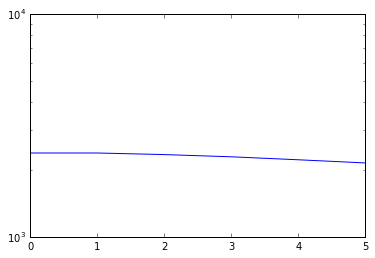

In [33]:
# %matplotlib inline

import matplotlib.pyplot as plt
from autograd.core import getval

plt.plot([getval(i) for i in train_losses])
plt.yscale('log')